# Simulated Annealing Prototypical Code

# 1.) Generate clusters for validating code

K-means clustering on the scikitlearn iris dataset. 

(150, 4)


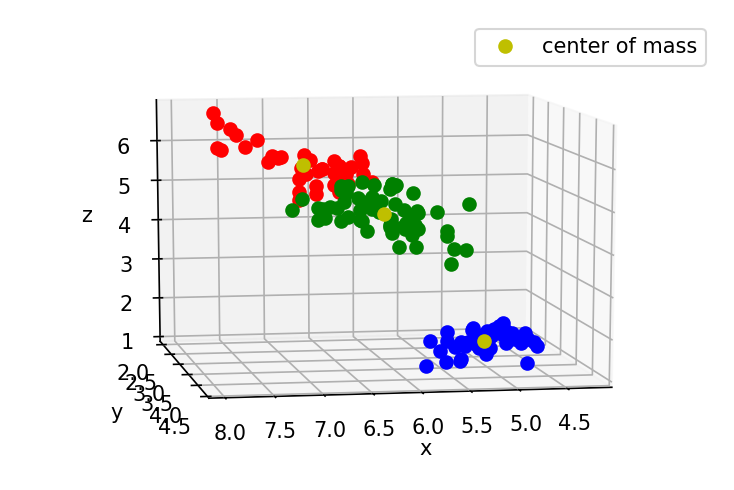

In [4]:
#Credit: Tanya Nesterova, github: @tanyanes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
import random

random.seed(2650)

wine=load_iris()
X=wine.data
print(X.shape)


kmData = KMeans(n_clusters = 3,n_init=10)
kmData.fit(X)
#these are which cluster per data point
assignments = kmData.predict(X)
#These are the optimized 'means' per cluster
clusterCenters = kmData.cluster_centers_

cluster1=[]
cluster2=[]
cluster3=[]
for i in range(len(X[:,0])):
    if(assignments[i] == 0):
        cluster1.append(X[i,:])
    if(assignments[i] == 1):
        cluster2.append(X[i,:])
    if(assignments[i] == 2):
        cluster3.append(X[i,:])

C = np.array(clusterCenters)

fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
cluster3 = np.array(cluster3)

ax.plot(cluster1[:,0],cluster1[:,1],cluster1[:,2],'o',color='r')
ax.plot(cluster2[:,0],cluster2[:,1],cluster2[:,2],'o',color='g')
ax.plot(cluster3[:,0],cluster3[:,1],cluster3[:,2],'o',color='b')
ax.plot(C[:,0],C[:,1],C[:,2],'o',color='y', label='center of mass')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
ax.view_init(elev=10., azim=80)

plt.show()

#Set the data you want to find the center of mass of
data = cluster3

# 2.) Set the objective function

In [5]:
#objective function to evaluate each parameter
def objective(p):
    x_i=p[0]
    y_i=p[1]
    z_i=p[2]
    corr = 0
    #mean = [np.mean(data[:,0]),np.mean(data[:,1],np.mean(data[:,2]))]
    for i in range(len(data[:,0])):
        #dot = x_i*data[i,0] + y_i*data[i,1] + z_i*data[i,2]
        #norm = LA.norm(np.array(p))*LA.norm(np.array([data[i,0],data[i,1]],data[i,2]))
        #corr.append(dot/norm)
        corr = corr + np.sqrt((x_i - data[i,0])**2 + (y_i - data[i,1])**2 + (z_i - data[i,2])**2)
    return(corr)

# 3.) Run the simulated annealing algorithm

In [31]:
random.seed(2650)

#define range for input
low_lim = [np.min(data[:,0]), np.min(data[:,1]), np.min(data[:,2])]
high_lim = [np.max(data[:,0]), np.max(data[:,1]), np.max(data[:,2])]

#generate an initial point
best = [random.uniform(low_lim[0], high_lim[0]),random.uniform(low_lim[1], high_lim[1]),random.uniform(low_lim[2], high_lim[2])]

#evaluate the initial point
best_eval = objective(best)

#current working solution
curr,curr_eval = best,best_eval

# total iterations of algorithm
k_max = 5000
# initial temperature
initial_temp = 10
# array of iterations from 0 to iterations - 1
iterations = [i for i in range(k_max)]
# temperatures for each iterations
temperatures = [initial_temp/float(i + 1) for i in iterations]
ts = np.array(temperatures)

candidates = []

#run the algorithm
for i in iterations:
    r = 0.01 #step size
    psi = random.random()*2*np.pi
    theta = random.random()*np.pi
    xOff = r*np.cos(psi)*np.sin(theta)
    yOff = r*np.sin(psi)*np.sin(theta)
    zOff = r*np.cos(theta)
    
    #take a step
    candidate = [curr[0] + xOff, curr[1] + yOff, curr[2] + zOff]
    
    candidates.append([candidate[0],candidate[1],candidate[2]])
    
    #evaluate the candidate point
    candidate_eval = objective(candidate)
    
    if(candidate_eval < best_eval):
        #store new best point
        best, best_eval = candidate, candidate_eval
        
    #get difference between old and current
    diff = candidate_eval - curr_eval
    
    #calculate temperature for current epoch
    t = ts[i]
    
    #calculate metropolis acceptance criterion
    metropolis = np.exp(-diff / t)
    
    # check if we should keep the new point
    if diff < 0 or np.random.rand() < metropolis:
        # store the new current point
        curr, curr_eval = candidate, candidate_eval

# 4.) Temperature plot over course of annealing

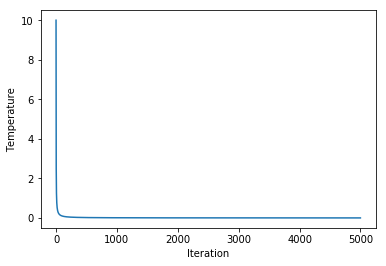

In [9]:
# plot iterations vs temperatures
plt.plot(iterations, temperatures)
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.show()

# 5.) Annealing pathway over each iteration

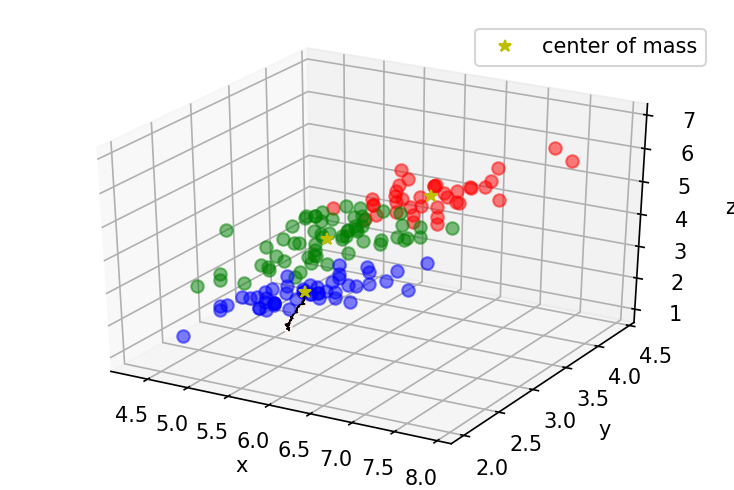

last element of MC simulation:  [5.01071582839009, 3.400445556542358, 1.4686688511394836]
calculated cluster center of mass:  [5.006, 3.418, 1.464]
k means center of mass:  [5.006 3.418 1.464 0.244]


In [33]:
fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

candidates = np.array(candidates)

t = np.linspace(1,len(candidates[:,0]),len(candidates[:,0]))

com = [np.mean(data[:,0]), np.mean(data[:,1]), np.mean(data[:,2])]

#ax.plot(X[:,0],X[:,1],X[:,2],'o',alpha=0.5)
ax.plot(cluster1[:,0],cluster1[:,1],cluster1[:,2],'o',color='r',alpha=0.5)
ax.plot(cluster2[:,0],cluster2[:,1],cluster2[:,2],'o',color='g',alpha=0.5)
ax.plot(cluster3[:,0],cluster3[:,1],cluster3[:,2],'o',color='b',alpha=0.5)
ax.plot(candidates[:,0],candidates[:,1],candidates[:,2],color='k',linewidth=0.5)
ax.plot(C[:,0],C[:,1],C[:,2],'o',color='y',marker='*',label='center of mass')
ax.scatter(candidates[:,0],candidates[:,1],candidates[:,2],c=t,cmap = 'Reds',s=3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()

make_movies=False

if make_movies:
    imagedata = []
    for ii in range(0,360,1):
        ax.view_init(elev=10., azim=ii)
        plt.savefig("movie%d.png" % ii)
        data = imageio.imread('movie{}.png'.format(ii))
        imagedata.append(data)
    imageio.mimwrite('anneal.mp4', imagedata, format= '.mp4', fps = 20)
plt.show()

print('last element of MC simulation: ',[candidates[k_max-1,0],candidates[k_max-1,1],candidates[k_max-1,2]])
print('calculated cluster center of mass: ',com)
print('k means center of mass: ',C[2])